# Orbital objects - I

### This notebook is licensed  under [CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/?ref=chooser-v1) © 2024 by André Moitinho (U. Lisbon)

## Setup


Here we import the libraries needed for this activity

While you should by now be familiar with the **numpy** (array manipulation) and **matplotlib/mpl_toolkits** (ploting), the other imports are less known:

The **ephem** library is used here for dealing with Two/Three Line Elements (TLEs) of orbital objects and computing their positions at different times.
The term "ephem" is short for the word ephemeris, which is the traditional term for a table giving the position of a planet, asteroid, or comet for a series of dates.

From the Astrophysics Source Code Library:  http://ascl.net/1112.014
_PyEphem provides scientific-grade astronomical computations for the Python programming language. Given a date and location on the Earth's surface, it can compute the positions of the Sun and Moon, of the planets and their moons, and of any asteroids, comets, or earth satellites whose orbital elements the user can provide. Additional functions are provided to compute the angular separation between two objects in the sky, to determine the constellation in which an object lies, and to find the times at which an object rises, transits, and sets on a particular day.
The numerical routines that lie behind PyEphem are those from the XEphem astronomy application (ascl:1112.013), whose author, Elwood Downey, generously gave permission for us to use them as the basis for PyEphem._

The **datetime** library is used for manipulating dates and times. We'll use it for setting times for orbit propagation.

Finally, the **csv** library handles CSV (Comma Separated Values) files and is used here for writing an output CSV file with results of orbit computations.

If you get errors check first if you haven't installed some of these libraries. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d         #for 3D plots as the name suggests
import ephem
import datetime
import csv

## A quick overview of datetime 
More in https://docs.python.org/3/library/datetime.html

In [2]:
# Set our date and inspect the result
mydate = datetime.datetime.today()
mydate

datetime.datetime(2024, 9, 11, 17, 57, 26, 813116)

You can set another date

In [3]:
datetime.datetime(2020, 11, 8,15)

datetime.datetime(2020, 11, 8, 15, 0)


The timedelta object provides time intervals. This is handy for adding/subtracting time intervals to dates.
<br>i.e. for creating arrays of times

In [4]:
datetime.timedelta(minutes=20)

datetime.timedelta(seconds=1200)

In [5]:
print(mydate)
print(mydate + datetime.timedelta(hours=20))

2024-09-11 17:57:26.813116
2024-09-12 13:57:26.813116


## Overview of ephem

Set observer's coordinates and time
This example uses Coimbra

In [6]:
obs = ephem.Observer()
obs.lat = np.deg2rad(40.2033)
obs.long = np.deg2rad(8.4103)
obs.date = datetime.datetime.today()

#another example: Bahia
#obs.lat = np.deg2rad(-11.409874)
#obs.long = np.deg2rad(-41.280857)

Note that the date is stored in the "obs" object in another format
<br>Can you guess what this number means?

In [7]:
obs.date

45545.24822715027

We can inspect the "obs" class with "help" 

In [8]:
help(obs)

Help on Observer in module ephem object:

class Observer(_libastro.Observer)
 |  A location on earth for which positions are to be computed.
 |  
 |  An `Observer` instance allows you to compute the positions of
 |  celestial bodies as seen from a particular latitude and longitude on
 |  the Earth's surface.  The constructor takes no parameters; instead,
 |  set its attributes once you have created it.  Defaults:
 |  
 |  `date` - the moment the `Observer` is created
 |  `lat` - zero latitude
 |  `lon` - zero longitude
 |  `elevation` - 0 meters above sea level
 |  `horizon` - 0 degrees
 |  `epoch` - J2000
 |  `temp` - 15 degrees Celsius
 |  `pressure` - 1010 mBar
 |  
 |  Method resolution order:
 |      Observer
 |      _libastro.Observer
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __copy__ = copy(self)
 |  
 |  __repr__(self)
 |      Return a useful textual representation of this Observer.
 |  
 |  compute_pressure(self)
 |      Set the atmospheric pressure for t

Load Satellite TLE data.

In [9]:
l1 = '0 STARLINK-1007'
l2 = '1 44713U 19074A   24255.00002315  .00384993  00000-0  13466-2 0  9997'
l3 = '2 44713  53.0449  81.1033 0006865 269.1989 346.9368 15.87731347  6024'

# This one is old and will give an error when integrating the orbit. Try it.
#l1 = 'ISS (ZARYA)'         
#l2 = '1 25544U 98067A   20324.17323782  .00001608  00000-0  37253-4 0  9993'
#l3 = '2 25544  51.6464 301.5752 0001608  65.2533  28.5305 15.49051503256043'

orbitElement = ephem.readtle(l1,l2,l3)


Our TLE was stored in the "orbitElement" object.
<br>Let's inspect orbitElement and list its attributes.

In [10]:
attributes=dir(orbitElement)
print(attributes)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']


Those are the names of the attributes. Some are obvious but others are not. 
<br>Since the object is documented, we can also evoke help.
<br>(or search for the pyephem package documentation - RTFM)

In [11]:
help(orbitElement)

Help on EarthSatellite object:

class EarthSatellite(Body)
 |  A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:
 |  
 |  _ap -- argument of perigee at epoch (degrees)
 |  _decay -- orbit decay rate (revolutions per day-squared)
 |  _drag -- object drag coefficient (per earth radius)
 |  _e -- eccentricity
 |  _epoch -- reference epoch (mjd)
 |  _inc -- inclination (degrees)
 |  _M -- mean anomaly (degrees from perigee at epoch)
 |  _n -- mean motion (revolutions per day)
 |  _orbit -- integer orbit number of epoch
 |  _raan -- right ascension of ascending node (degrees)
 |  
 |  Method resolution order:
 |      EarthSatellite
 |      Body
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, /, *args, **kwargs)
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  ---------------------

Compute the orbit

In [12]:
orbitElement.compute(obs)

Check a result. e.g. altitude

In [13]:
orbitElement.alt

-0.5697687268257141

## Analysis - I

### Satellite tracks: Time series x-y line plot and trajectory in polar plot.

Make some datetimes covering a whole day (24h, starting at a time of your choice)
<br>This will provide the times for plotting 

In [14]:
midnight = datetime.datetime.replace(datetime.datetime.now(), hour=0)
#midnight = datetime.datetime.replace(datetime.datetime(2021, 11, 9, 0, 0), hour=0)

tstep = 20  # use with caution: 60/tstep must be an integer
dt  = [midnight + datetime.timedelta(minutes=tstep*x) for x in range(0, int(24*60/tstep))]

Compute satellite locations (altitude and azimuth - alt, az) at each datetime

In [15]:
sat_alt, sat_az = [], []
for date in dt:
    obs.date = date
    orbitElement.compute(obs)
    sat_alt.append(np.rad2deg(orbitElement.alt))
    sat_az.append(np.rad2deg(orbitElement.az))

Plot satellite tracks:
* alt vs time
* az vs time
* satellite track (alt and az) in a polar plot

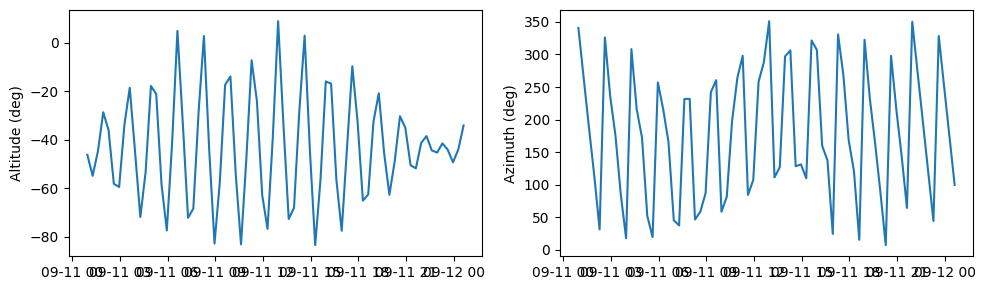

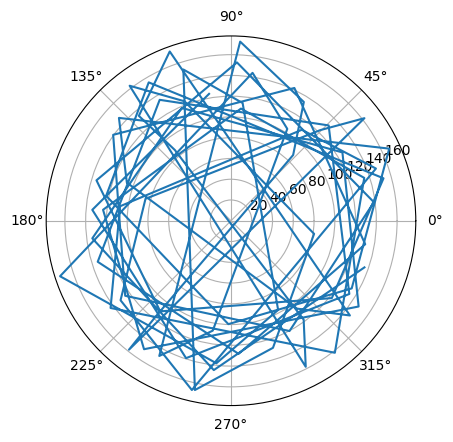

In [16]:
fig=plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(dt, sat_alt)
plt.ylabel("Altitude (deg)")
#plt.xticks(rotation=25)

plt.subplot(122)
plt.plot(dt, sat_az)
plt.ylabel("Azimuth (deg)")
#plt.xticks(rotation=25)
plt.tight_layout()
plt.show()

plt.polar(np.deg2rad(sat_az), 90-np.array(sat_alt))



These aren't really good visualisations...

What are the problems and how can we fix them?

In [17]:











# Don't peek!












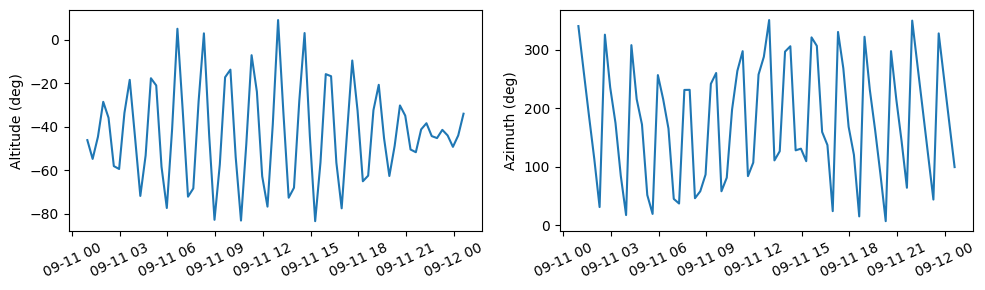

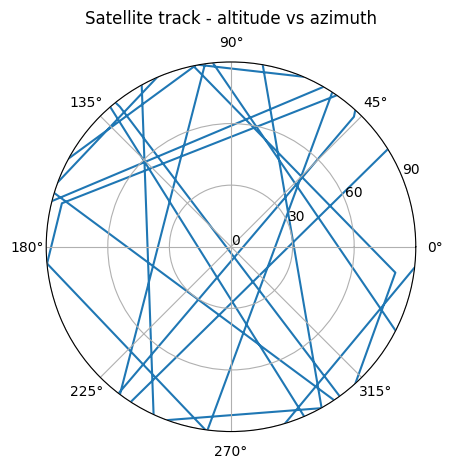

In [18]:
# Redo the orbits in a finer time resolution!

fig=plt.figure(figsize=(10,3))
plt.subplot(121)
plt.plot(dt, sat_alt)
plt.ylabel("Altitude (deg)")
plt.xticks(rotation=25) # Rotate xlabels

plt.subplot(122)
plt.plot(dt, sat_az)
plt.ylabel("Azimuth (deg)")
plt.xticks(rotation=25)  # Rotate xlabels
plt.tight_layout()
plt.show()

plt.polar(np.deg2rad(sat_az), 90-np.array(sat_alt),zorder=-10) # plot trajectory under the radial labels
plt.ylim(0,90) # filter out positions below the horizon
plt.yticks(np.arange(0, 91, 30)) # decrease the number of radial markers
plt.title('Satellite track - altitude vs azimuth', va='bottom') # add an informative title

#plt.xlabel('Azimuth')
#plt.gca().set_rlabel_position(30)  
#plt.gca().set_ylabel('Altitude (degrees)', labelpad=30)  


plt.show()

## Analysis - II
### Visualising the Earth's orbital environment in 2D and 3D

Here is where you process the whole TLE file, propagate orbits, compute 3D cartesian positions of the satellites and write the output to a file for opening in other analysis software. You will inspect this output file with "topcat" (http://www.star.bris.ac.uk/~mbt/topcat)


I provide a utility function for reading the TLE file into a list of "EarthSatellite" objects. It is for you to understand how the function works or use another method.

In [19]:
# Auxiliary function for reading 3LE files

def loadTLE(filename):
    """ Loads a TLE file and creates a list of satellites."""
    f = open(filename)
    satlist = []
    l1 = f.readline()
    while l1:
        l2 = f.readline()
        l3 = f.readline()
        sat = ephem.readtle(l1,l2,l3)
        satlist.append(sat)
        # print(sat.name) # uncomment to print satellite names on the screen, but it will take a looong time.
        l1 = f.readline()

    f.close()
    print("%i satellites loaded into list"%len(satlist))
    return satlist

**Read TLE file into a list of "EarthSatellite" objects**

In [20]:

objlist = loadTLE('3le_11092024.txt')


26815 satellites loaded into list


### Compute orbits and create arrays of X,Y,Z cartesian positions relative to the Earth of objects in the TLE file.

Sometimes, ephem will not compute the positions and exit with an error. This is often due large propagated errors, e.g. from high speed or old date of some TLEs. To overcome this unwanted termination, you will have to capture those exceptions and eliminate the problematic satellites from the list. 

In [21]:
XX, YY, ZZ = [], [], []


for i in range(0, len(objlist)):
    objlist[i].compute(obs)
    # sometimes positions cannot be computed (date of obs too different from current date, etc). 
    # We will see how to capture these exceptions and delete the object from our lists
    try:
        radius = ephem.earth_radius + objlist[i].elevation
        X = radius * np.cos(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Y = radius * np.sin(objlist[i].sublong) * np.cos(objlist[i].sublat)
        Z = radius * np.sin(objlist[i].sublat)
    except RuntimeError:
        print("%i deleted %s: cannot compute the body's position at %s" % (i,objlist[i].name,obs.date))
        X=Y=Z = float('nan')
        
    XX.append(X)
    YY.append(Y)
    ZZ.append(Z)


XX = np.array(XX)
YY = np.array(YY)
ZZ = np.array(ZZ)

#Note that a python list was used for the append phase and then converted to a numpy array. 
#Appending to large numpy arrays can become very slow.

21313 deleted 0 STARLINK-5230: cannot compute the body's position at 2024/9/12 00:37:27


### Plot cartesian XYZ positions in 3D

Note: You might get some warnings which can be safely muted with:
np.warnings.filterwarnings('ignore') or reset with np.warnings.filterwarnings('default')



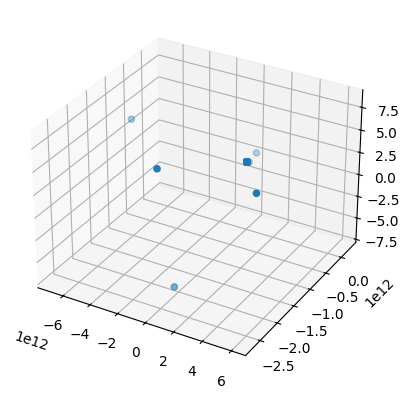

In [22]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(XX,YY,ZZ)

Doesn't look good, does it?

There are some outliers at really great distances (see the plot scale). <br>
Let's get rid of them to provide a good view of the LEO and GEO environments.

Below we illustrate:
* the use of **masks** for data selection
* changing the 3D view

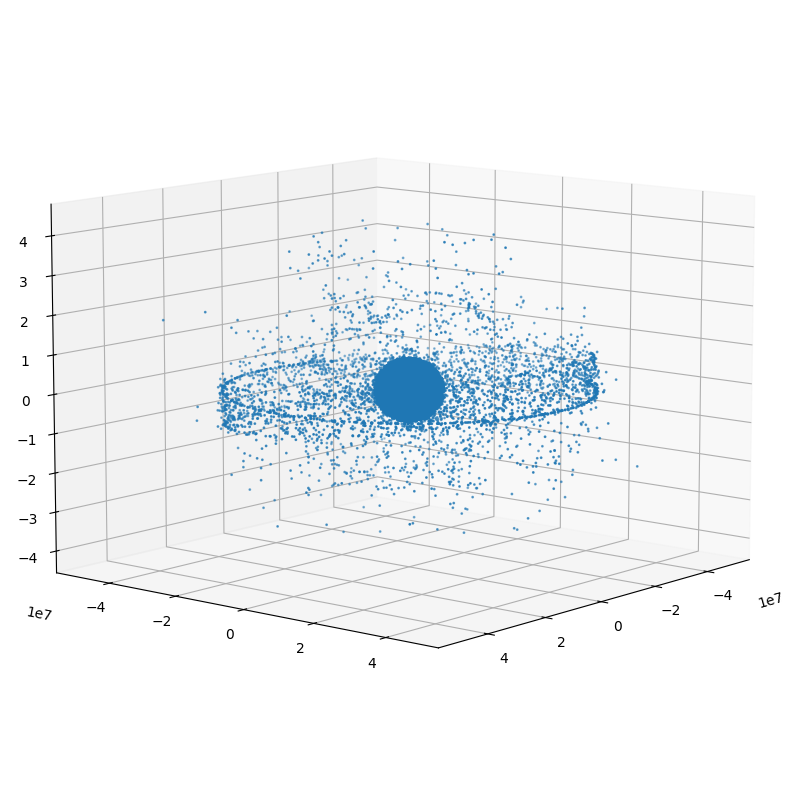

In [23]:
# Set a maximum distance and create a mask for filtering out distance > maxrad 
maxrad = 5.0e7
mask = (abs(XX) < maxrad) & (abs(YY) < maxrad) & (abs(ZZ) < maxrad) 

#initialise figure and axes. Make figure larger than the jupyter default
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection='3d')

#plot the masked XYZ values. make size of markers smaller (s = 1)
ax.scatter3D(XX[mask],YY[mask],ZZ[mask], s = 1)

# rotate the axes and update (angle in z, angle in xy plane)
ax.view_init(10,40)


More:
* Try other dates.
* Try making a movie. There are several libraries (e.g. ffmpeg) and approaches for that. Try changing the view angle and distance in the animation.

### Prepare to export the data to a csv file

We did a 3D plot of the Earth's orbital environment today. That was nice. But now we want to export the data to a file so that we can explore them with more specialised interactive visualisation software. 

For that we will export to a CSV file, with a header identifying the data exported. Lets take a look into the EarthSatellite object attributes:

In [24]:
# Create the "attrlist" array (we saw how to do this in previous tutorials)
# We will use the first object in the list (index "0") as a template

attrlist=dir(objlist[0])
print(attrlist)

['M', '_M', '__class__', '__copy__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'ap', 'az', 'catalog_number', 'circumpolar', 'compute', 'copy', 'dec', 'decay', 'drag', 'e', 'eclipsed', 'elevation', 'elong', 'epoch', 'g_dec', 'g_ra', 'ha', 'inc', 'mag', 'n', 'name', 'neverup', 'orbit', 'parallactic_angle', 'ra', 'raan', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'writedb']



Let's check the attribute values.

In [25]:
nobj = 0
print("** Attributes for %s ** (name, value)"%objlist[nobj].name)
for attr in attrlist:
    a = getattr(objlist[nobj], attr)
    # We will convert angles to real values in radians.
    # But some (one) attributes are strings, for which we cannot do that, 
    # so we need to capture the exception
#     try:
#         print("%s\t %s\t %s" % (attr,a, float(a)))
#     except ValueError:
#         print("HERE IT IS %s, %s" % (attr,a))
    print("%s\t %s" % (attr,a))    


** Attributes for 0 VANGUARD 1 ** (name, value)
M	 269.21429443359375
_M	 269:12:51.5
__class__	 <class 'ephem.EarthSatellite'>
__copy__	 <built-in method __copy__ of ephem.EarthSatellite object at 0x74a9501aa9e0>
__delattr__	 <method-wrapper '__delattr__' of ephem.EarthSatellite object at 0x74a9501aa9e0>
__dir__	 <built-in method __dir__ of ephem.EarthSatellite object at 0x74a9501aa9e0>
__doc__	 A satellite in orbit around the Earth, usually built by passing the text of a TLE entry to the `ephem.readtle()` routine. You can read and write its orbital parameters through the following attributes:

_ap -- argument of perigee at epoch (degrees)
_decay -- orbit decay rate (revolutions per day-squared)
_drag -- object drag coefficient (per earth radius)
_e -- eccentricity
_epoch -- reference epoch (mjd)
_inc -- inclination (degrees)
_M -- mean anomaly (degrees from perigee at epoch)
_n -- mean motion (revolutions per day)
_orbit -- integer orbit number of epoch
_raan -- right ascension of as

/tmp/ipykernel_140498/4181838907.py:4: DeprecationWarning: the ephem.Body attributes 'rise_time', 'rise_az', 'transit_time', 'transit_alt', 'set_time', 'set_az', 'circumpolar', and 'never_up' are deprecated; please convert your program to use the ephem.Observer functions next_rising(), previous_rising(), next_transit(), and so forth

  a = getattr(objlist[nobj], attr)


#### Select attributes
Many attributes refer to methods, docstrings, etc, which we dont want in our output file.
We only want to export those with actual data:

'_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time'

Note that the XYZ coordinates have been determined separately and are not included in the EarthSatellite object. We will deal with them separately.

In [26]:
# array with attributes to export
attrlist = ['_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 
               'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 
               'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 
               'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 
               'transit_alt', 'transit_time']

Now, create the header array, which will also include the X,Y,Z coordinates that you have computed.

**Create an array called "header" with the names of the variables. It will be used for printing the header into the output file** 

Note: we may also make the header more human friendy by changing the names in some fields (e.g. _n -> mean motion). Remember that the "help" instructuion provides a description of the attributes.

In [27]:
# Create the "header" array
header = attrlist.copy()
header.append('X')
header.append('Y')
header.append('Z')
print(header)

['_ap', '_decay', '_drag', '_e', '_epoch', '_inc', '_n', '_orbit', '_raan', 'a_dec', 'a_epoch', 'a_ra', 'alt', 'az', 'catalog_number', 'circumpolar', 'dec', 'eclipsed', 'elevation', 'elong', 'g_dec', 'g_ra', 'mag', 'name', 'neverup', 'ra', 'radius', 'range', 'range_velocity', 'rise_az', 'rise_time', 'set_az', 'set_time', 'size', 'sublat', 'sublong', 'transit_alt', 'transit_time', 'X', 'Y', 'Z']


#### Start writing the output to a csv file.

* Open an output file for writing (create if necessary)
* Write the header to the file

In [28]:
# Open the file for writing (create if necessary)
resultFile = open("XYZtle_11092024.csv",'w')
wr = csv.writer(resultFile, delimiter=',')

# write the header
# Note: we may also make the header more human friendy by changing the names in some fields
# (e.g. _n -> mean motion)
wr.writerow(header)


275

**Write the data to the csv file. There will be several exceptions that you will need to handle**

Tip: This takes quite a while. You can use a shorter TLE file for testing.

In [29]:
# Write the data. Don't forget to include X, Y and Z

# iterate over the objects
for i in range(0, len(objlist)):
    outline = []
    # fill the output line by iterating over the object's attributes
    for attr in attrlist:
        try:
            a = getattr(objlist[i], attr)
        except RuntimeError:
            a = (float('nan'))
        try:
            outline.append(float(a))
        except ValueError:
            outline.append(a)
        except TypeError:
            outline.append(float('nan'))

    # append the computed XYZ 
    outline.extend((XX[i], YY[i], ZZ[i]))  
    # write the line for this object
    wr.writerow(outline)

# close the output file
resultFile.close() 


#### That's it. Now we'll continue exploring with Topcat.